In [2]:
import os
import math
import numpy as np
import datetime as dt
import time
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('Data/Training_scaled_imputed.csv', index_col=0)
data.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48
application_key,,,,,,,,,,,,,,,,,,,,,
230032,-0.543205,0.384978,-0.487020,-0.270584,-0.188725,-0.445421,-0.245724,-0.646139,0.125085,-0.178528,...,2.154760,-0.815147,0.429673,-0.654035,0.549396,-0.274915,0.036359,-0.283197,0,10.0
230033,1.038581,-0.157590,-0.487020,-0.270584,-0.188725,-0.417607,-0.213290,-0.362946,-0.311737,-0.250305,...,-0.207069,0.043273,-0.060165,-0.886566,1.027630,-0.277477,-0.242866,-0.283197,1,732.0
230034,-0.026488,-0.420587,-0.487020,-0.270584,-0.188725,0.177171,-0.320106,-0.280110,-0.399942,-0.418459,...,-0.207069,0.139021,-1.743373,-0.886566,-0.885309,1.193120,-0.149791,-0.283197,0,89.0
230035,-0.089760,-0.536732,-0.487020,-0.270584,-0.188725,0.095052,0.190970,-0.185615,-0.270650,0.102518,...,-0.207069,-0.053477,-0.218319,-0.475171,-0.566486,-0.708319,-0.242866,-0.283197,1,3.0
230036,0.416412,-0.670029,-0.466734,-0.270584,-0.188725,1.041017,-0.256863,-0.132037,-0.513956,-0.385819,...,-0.207069,0.581373,-0.210165,-0.886566,-0.885309,0.894845,-0.056716,-0.283197,1,5.0


In [20]:
#dummy  -  remove after new data set 
data = pd.read_csv('Data/Training_scaled_imputed.csv', index_col=0)
data['default_ind']  = pd.read_csv('Data/TrainingData.csv', index_col=0)['default_ind']
data.describe()

C:\Users\Nithya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
count,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,...,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000,83000.000000
mean,-0.035905,-0.021234,-0.001218,-0.001489,-0.000965,-0.035129,-0.026064,-0.111755,-0.081017,-0.001990,...,-0.247598,-0.019666,0.012735,-0.005588,0.051851,0.047195,-0.062717,0.372976,556.021277,0.287410
std,1.002318,0.969302,0.996913,0.996953,0.996852,0.880235,0.956406,0.899428,0.949124,0.997093,...,0.659887,0.617298,1.004462,0.996237,0.968121,0.715700,0.854236,0.483599,1106.953295,0.452557
min,-2.852612,-0.677610,-0.487020,-0.270584,-0.188725,-0.445421,-0.374327,-0.678146,-0.671575,-0.456780,...,-3.313163,-2.938493,-0.886566,-1.044721,-2.626674,-0.242866,-0.283197,0.000000,2.000000,0.000000
25%,-0.764655,-0.585591,-0.487020,-0.270584,-0.188725,-0.418978,-0.333160,-0.601024,-0.617020,-0.439009,...,-0.647496,-0.285270,-0.886566,-0.725897,-0.689613,-0.242866,-0.283197,0.000000,8.000000,0.000000
50%,-0.079214,-0.345876,-0.459071,-0.270584,-0.188725,-0.310167,-0.243848,-0.481134,-0.461301,-0.312441,...,-0.156614,0.034731,-0.351766,-0.247663,0.257884,-0.242866,-0.283197,0.000000,17.000000,0.000000
75%,0.648407,0.169069,0.102373,-0.270584,-0.188725,-0.076829,-0.022598,-0.018919,0.058590,0.057246,...,0.136327,0.315220,0.656120,0.549396,0.912656,0.129434,-0.283197,1.000000,111.000000,1.000000
max,2.135286,19.248302,35.516579,14.840770,28.623236,25.269881,120.149028,28.328041,15.918352,84.875335,...,18.066775,4.492185,4.461442,13.461737,1.193120,23.863570,14.911982,1.000000,3247.000000,1.000000


## Encoding

In [23]:
def encoding(train_data,test_data=None):
    
    counts = train_data.groupby('mvar48')['default_ind'].count()
    means = train_data.groupby('mvar48')['default_ind'].mean()
    m = 0
    smooth_mean = (counts * means + m * train_data['mvar48'].mean()) / (counts + m)
    enc_48 = dict(smooth_mean)
    train_data['mvar48'] = train_data['mvar48'].map(enc_48)
    #train_data = train_data.replace({'C':0,'L':1})
    if test_data==None:
        return train_data
    else:
        #test_data = test_data.replace({'C':0,'L':1})
        test_data['mvar48'] = test_data['mvar48'].map(enc_48)
        return train_data, test_data       

In [24]:
data_enc = encoding(data)
y = data_enc['default_ind']
X_cols = list(set(data_enc.columns) - {'default_ind'})
X = data_enc[X_cols]

# PCA

In [38]:
def PCA_(X):
    
    from sklearn.decomposition import PCA

    N = range(1,X.shape[1]+1)
    variance = []
    for i in range(len(N)):
        pca = PCA(n_components = N[i])
        pca.fit(X)
        variance.append(sum(pca.explained_variance_))
    
    plt.figure(figsize = [20,20])
    plt.plot(N,variance/variance[len(variance)-1])
    plt.scatter(N,variance/variance[len(variance)-1])
    plt.xlabel('Number of components')
    plt.ylabel('Variance captured')
    plt.show()
    print(variance/variance[len(variance)-1])
    
    pca = PCA(n_components = 13) # The number of components can be chosen after inspecting the variances after imputation
    pca.fit(X)
    X_new = pca.transform(X)
    
    return(X_new)
  


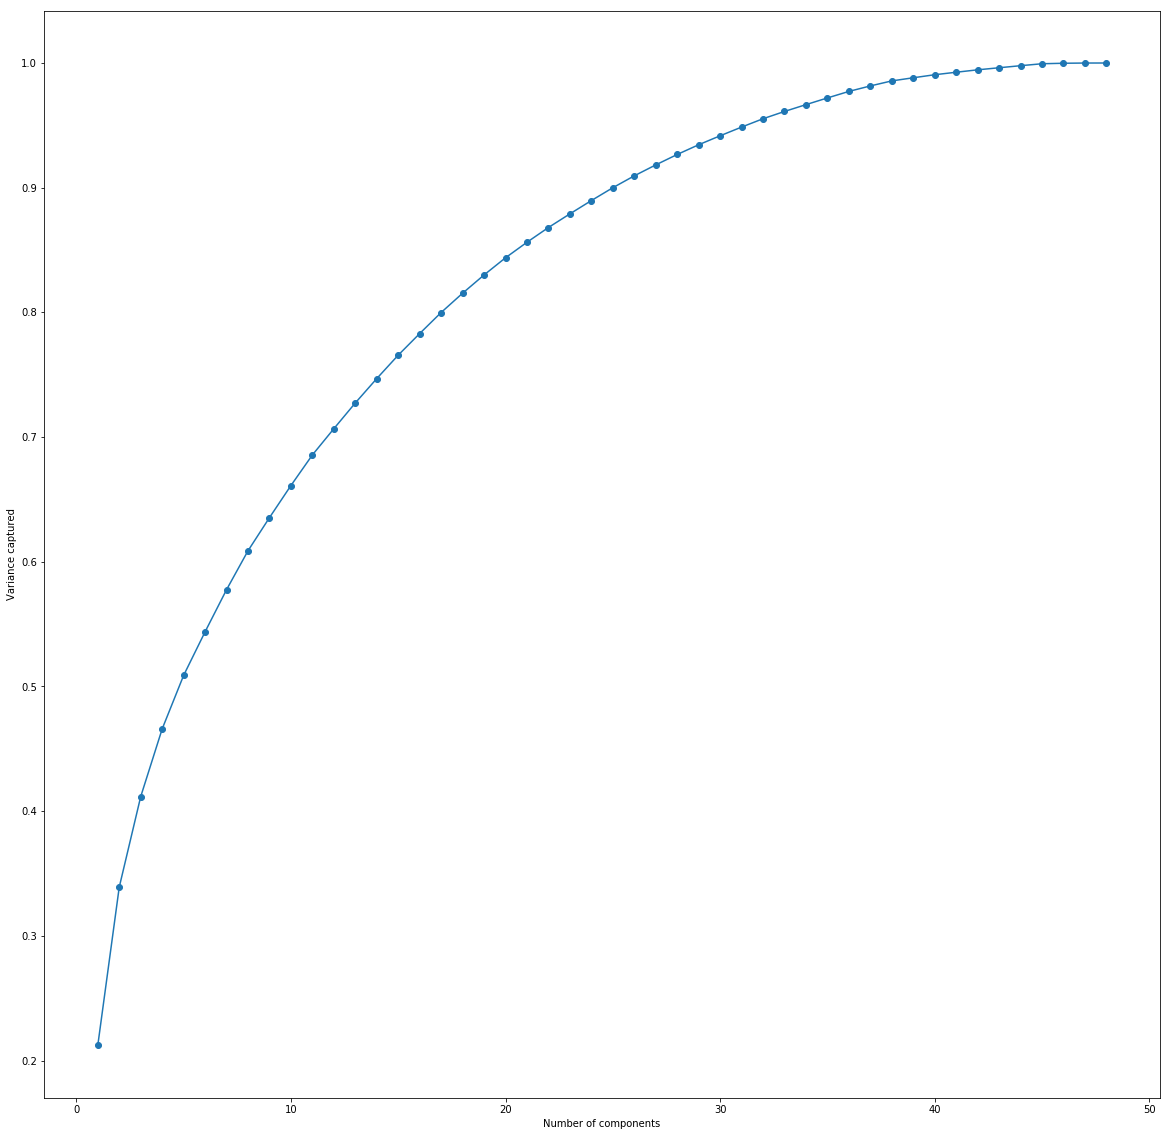

[0.21216275 0.33905351 0.41164903 0.46592451 0.50887937 0.54383958
 0.57761452 0.60881519 0.63539139 0.66113318 0.68566045 0.70671211
 0.72736627 0.74691447 0.76570107 0.783022   0.79990043 0.81537239
 0.83002098 0.84379227 0.85623669 0.86807418 0.87901469 0.8896675
 0.89997295 0.90950716 0.918269   0.9266397  0.93443222 0.94162904
 0.94859745 0.9553002  0.96113885 0.96660961 0.97197545 0.97720766
 0.98161358 0.98563868 0.98815413 0.99058919 0.99259525 0.99451699
 0.99618657 0.99783436 0.9993992  0.99979212 0.99996833 1.        ]


In [39]:
X_pca = PCA_(X)

## LDA

In [48]:
def LDA_(X,y):
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    LDA = LinearDiscriminantAnalysis(n_components = X.shape[0]+1)
    X_new = LDA.fit_transform(X,y) 
    return(X_new)

In [49]:
X_lda = LDA_(X,y)